In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors

In [16]:
# Read data 
data = np.load('data/np_data.npy')
data.shape

(15315, 3200)

In [17]:
# select source signals 
num_shots = 3
receivers_per_line = 638 
num_lines = 8 

source_idx = np.array([(receivers_per_line *num_lines)*i + i for i in range(num_shots +1)])
source_idx = np.concatenate((np.array([-1]),source_idx))
source_idx


array([   -1,     0,  5105, 10210, 15315])

In [18]:
# get time stamps 
def get_time(data,delta_t=2*1e-3):
    return np.arange(data.shape[1])*delta_t

In [19]:
# this returns the signals from given shot and line 
def get_receivers_data(shot_no,line_no,data=data):
    signal = data[source_idx[shot_no]+1:source_idx[shot_no +1]] # select the data from given shot
    line_signals = np.split(signal,num_lines,axis=0)            # split the array into num of lines 
    return np.array(line_signals[line_no-1])                    # and select the line             

In [30]:
# plot data from given shot + line 
def plot_signal(shot_no,line_no,data=data):
    signal = get_receivers_data(shot_no,line_no)   
    t = get_time(data)                    # get time 
    R = np.arange(1,receivers_per_line+1) # get receiver no 
    plt.pcolormesh(R,t, signal.T, shading='auto', cmap='RdBu_r')
    plt.clim([-0.25, 0.25])   # set the color (amplitude) limit 
    plt.ylim(t[-1],t[0]) 
    plt.rcParams["figure.figsize"] = (10,10)
    plt.xlabel('Receiver #')
    plt.ylabel('time(ms)')

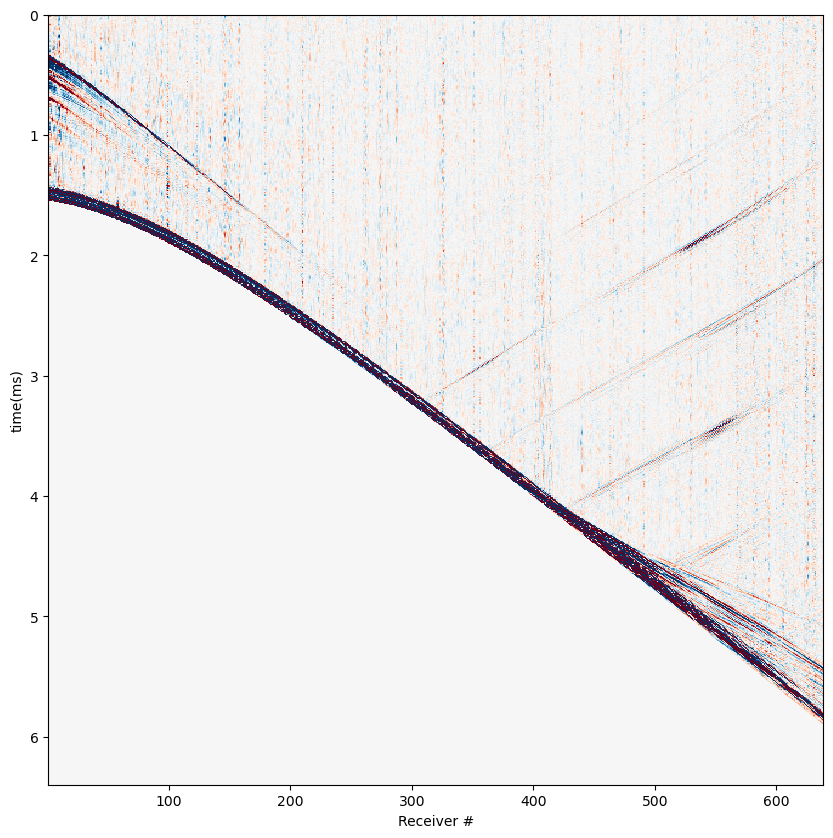

In [31]:
plot_signal(1,1)